<a href="https://colab.research.google.com/github/noelivander/BD-2/blob/main/prepare_data_IndonesiaGelap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

Gaza = pd.read_csv('Gaza.csv')
print(Gaza.head())

   conversation_id_str                      created_at  favorite_count  \
0  1909911666118058083  Fri Apr 11 17:35:11 +0000 2025               0   
1  1910748325885948398  Fri Apr 11 17:34:35 +0000 2025               0   
2  1910748256583508141  Fri Apr 11 17:34:19 +0000 2025               0   
3  1910519174721634794  Fri Apr 11 17:32:18 +0000 2025               0   
4  1910747595921907968  Fri Apr 11 17:31:41 +0000 2025               0   

                                           full_text               id_str  \
0  @Sujudzz @mohzen51 @KompasTV iki opo cuk? wkwk...  1910748475207421971   
1  IYALAH kan mereka perang demi mempertahankan t...  1910748325885948398   
2  Perang Gaza bukan baru mula 7 oktober dah berl...  1910748256583508141   
3  @penaikhwan Rachel Corrie adalah seorang aktiv...  1910747750897197131   
4  Pas udah pulih terus pas balik ke Gaza lagi ga...  1910747595921907968   

                                         image_url in_reply_to_screen_name  \
0  https://pbs

 ___
 Menggunakan library pandas untuk membaca data dari file CSV bernama "Gaza.csv" dan menyimpannya ke dalam variabel Gaza dalam bentuk DataFrame. Kemudian, kode mencetak lima baris pertama dari data tersebut menggunakan Gaza.head() agar pengguna bisa melihat cuplikan awal isi dan struktur tabel secara ringkas.

In [4]:
Gaza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      213 non-null    int64 
 1   created_at               213 non-null    object
 2   favorite_count           213 non-null    int64 
 3   full_text                213 non-null    object
 4   id_str                   213 non-null    int64 
 5   image_url                30 non-null     object
 6   in_reply_to_screen_name  132 non-null    object
 7   lang                     213 non-null    object
 8   location                 105 non-null    object
 9   quote_count              213 non-null    int64 
 10  reply_count              213 non-null    int64 
 11  retweet_count            213 non-null    int64 
 12  tweet_url                213 non-null    object
 13  user_id_str              213 non-null    int64 
 14  username                 213 non-null    o

___
Menampilkan informasi ringkas tentang DataFrame Gaza, seperti jumlah baris, jumlah kolom, nama kolom, tipe data setiap kolom, jumlah data non-null (tidak kosong), dan penggunaan memori. Ini berguna untuk memahami struktur data dan mengecek apakah ada data yang hilang (missing values).

**Tahapan Cleaning Data**

Menampilkan isi kolom full_text yang berisi tentang beberapa komentar-komentar masyarakat

In [5]:
Gaza["full_text"]

,full_text
0,@Sujudzz @mohzen51 @KompasTV iki opo cuk? wkwk...
1,IYALAH kan mereka perang demi mempertahankan t...
2,Perang Gaza bukan baru mula 7 oktober dah berl...
3,@penaikhwan Rachel Corrie adalah seorang aktiv...
4,Pas udah pulih terus pas balik ke Gaza lagi ga...
...,...
208,@tempodotco Mala memudahkan zionist buat claim...
209,@nu_online @ulil Senada dengan kebijakan China...
210,Aktivis Amerika di Chicago memegang anak yatim...
211,@TirtoID Jualan gaza aja pak... - el stafsus d...


Fungsi cleaning untuk membersihkan simbol-simbol yang tidak penting atau tidak digunakan

In [6]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

Menyimpan hasilnya didalam sebuah variabel yang baru

In [7]:
Gaza["text_clean"] = ''

In [8]:
for i, row in Gaza.iterrows():
    Gaza.at[i, "text_clean"] = clean(row.full_text)

Menampilkan 5 data yang berada dibagian atas

In [9]:
Gaza.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1909911666118058083,Fri Apr 11 17:35:11 +0000 2025,0,@Sujudzz @mohzen51 @KompasTV iki opo cuk? wkwk...,1910748475207421971,https://pbs.twimg.com/media/GoRXVKmbYAIKlJG.png,Sujudzz,in,Kisik,0,0,0,https://x.com/awendehay/status/191074847520742...,553229610,awendehay,@Sujudzz @mohzen51 @KompasTV iki opo cuk? wkwk...
1,1910748325885948398,Fri Apr 11 17:34:35 +0000 2025,0,IYALAH kan mereka perang demi mempertahankan t...,1910748325885948398,NaN,NaN,in,DO NOT FOLLOW ‼️,0,0,0,https://x.com/kitashinsuuke/status/19107483258...,1275990071930322945,kitashinsuuke,IYALAH kan mereka perang demi mempertahankan t...
2,1910748256583508141,Fri Apr 11 17:34:19 +0000 2025,0,Perang Gaza bukan baru mula 7 oktober dah berl...,1910748256583508141,NaN,NaN,in,NaN,0,0,0,https://x.com/iqayacob/status/1910748256583508141,843734939371634688,iqayacob,Perang Gaza bukan baru mula 7 oktober dah berl...
3,1910519174721634794,Fri Apr 11 17:32:18 +0000 2025,0,@penaikhwan Rachel Corrie adalah seorang aktiv...,1910747750897197131,NaN,penaikhwan,in,NaN,0,0,0,https://x.com/Layar_Buram/status/1910747750897...,1455058149736550400,Layar_Buram,@penaikhwan Rachel Corrie adalah seorang aktiv...
4,1910747595921907968,Fri Apr 11 17:31:41 +0000 2025,0,Pas udah pulih terus pas balik ke Gaza lagi ga...,1910747595921907968,NaN,NaN,in,Indonesia,0,0,0,https://x.com/Rahdioactivee/status/19107475959...,614811562,Rahdioactivee,Pas udah pulih terus pas balik ke Gaza lagi ga...


Membandingkan data sesudah dan sebelum di clean

In [10]:
Gaza[["full_text", "text_clean"]].head()

,full_text,text_clean
0,@Sujudzz @mohzen51 @KompasTV iki opo cuk? wkwk...,@Sujudzz @mohzen51 @KompasTV iki opo cuk? wkwk...
1,IYALAH kan mereka perang demi mempertahankan t...,IYALAH kan mereka perang demi mempertahankan t...
2,Perang Gaza bukan baru mula 7 oktober dah berl...,Perang Gaza bukan baru mula 7 oktober dah berl...
3,@penaikhwan Rachel Corrie adalah seorang aktiv...,@penaikhwan Rachel Corrie adalah seorang aktiv...
4,Pas udah pulih terus pas balik ke Gaza lagi ga...,Pas udah pulih terus pas balik ke Gaza lagi ga...


Natural Language ToolKit Process

Menginstal Natural Language Toolkit

In [11]:
pip install nltk

Mendownload dataset

In [12]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Melakukan proses tokenisasi dalam bahasa "english"

In [13]:
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


melakukan tokenisasi (memecah teks menjadi kata-kata) pada kolom 'text_clean' di DataFrame Gaza. Proses ini dilakukan dengan fungsi word_tokenize, yang diterapkan ke setiap baris menggunakan .apply(). Hasil tokenisasi disimpan di kolom baru bernama 'tokenized_text'. Kemudian, kode menampilkan beberapa baris pertama dari kolom 'text_clean' dan 'tokenized_text' untuk melihat hasil pemecahan teks menjadi kata-kata.

In [14]:
# Tokenisasi kata pada kolom 'text_clean'
Gaza['tokenized_text'] = Gaza['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(Gaza[['text_clean', 'tokenized_text']].head())


                                          text_clean  \
0  @Sujudzz @mohzen51 @KompasTV iki opo cuk? wkwk...   
1  IYALAH kan mereka perang demi mempertahankan t...   
2  Perang Gaza bukan baru mula 7 oktober dah berl...   
3  @penaikhwan Rachel Corrie adalah seorang aktiv...   
4  Pas udah pulih terus pas balik ke Gaza lagi ga...   

                                      tokenized_text  
0  [@, Sujudzz, @, mohzen51, @, KompasTV, iki, op...  
1  [IYALAH, kan, mereka, perang, demi, mempertaha...  
2  [Perang, Gaza, bukan, baru, mula, 7, oktober, ...  
3  [@, penaikhwan, Rachel, Corrie, adalah, seoran...  
4  [Pas, udah, pulih, terus, pas, balik, ke, Gaza...  


Mencoba menampilkan 5 data teratas setelah di tokenisasi

In [15]:
Gaza["tokenized_text"].head()

,tokenized_text
0,"[@, Sujudzz, @, mohzen51, @, KompasTV, iki, op..."
1,"[IYALAH, kan, mereka, perang, demi, mempertaha..."
2,"[Perang, Gaza, bukan, baru, mula, 7, oktober, ..."
3,"[@, penaikhwan, Rachel, Corrie, adalah, seoran..."
4,"[Pas, udah, pulih, terus, pas, balik, ke, Gaza..."


Mengimport stopwords yang ada dalam bahasa "indonesia"

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

Berikut ini penerapan stopwords dalam bahasa inggris

In [17]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

Mengambil stopwords Indonesia, lalu menerapkan fungsi "remove" stopwords ke data yang telah di tokenisasi sebelumnya untuk menampilkan data hasilnya.

In [18]:
stop_words_indonesia = stopwords.words('indonesian')

def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

Gaza['tokenized_stopwords'] = Gaza['tokenized_text'].apply(remove_stopwords)

Gaza[['tokenized_text', 'tokenized_stopwords']].head()

,tokenized_text,tokenized_stopwords
0,"[@, Sujudzz, @, mohzen51, @, KompasTV, iki, op...","[@, Sujudzz, @, mohzen51, @, KompasTV, iki, op..."
1,"[IYALAH, kan, mereka, perang, demi, mempertaha...","[IYALAH, perang, mempertahankan, tanah, airnya..."
2,"[Perang, Gaza, bukan, baru, mula, 7, oktober, ...","[Perang, Gaza, 7, oktober, dah, berlaku, tu, s..."
3,"[@, penaikhwan, Rachel, Corrie, adalah, seoran...","[@, penaikhwan, Rachel, Corrie, aktivis, pro-P..."
4,"[Pas, udah, pulih, terus, pas, balik, ke, Gaza...","[Pas, udah, pulih, pas, Gaza, gaza, nya, Uda, ..."


Berikut ini penerapan stemming

In [19]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


Menginstal paket yang dibutuhkan

In [20]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.0 MB/s eta 0:00:00


Mengimport paket yang telah diinstal dan membuat objek stemmer untuk membentuk fungsi steeming yang kemudian nantinya akan diterapkan pada data yang telah di stopwords sebelumnya lalu menampilkan hasilnya.

In [21]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

Gaza['stemmed_words'] = Gaza['tokenized_stopwords'].apply(stemming_sastrawi)

Gaza[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[@, Sujudzz, @, mohzen51, @, KompasTV, iki, op...","[, sujudzz, , mohzen51, , kompastv, iki, opo, ..."
1,"[IYALAH, perang, mempertahankan, tanah, airnya...","[iya, perang, tahan, tanah, air, wilayah, gaza..."
2,"[Perang, Gaza, 7, oktober, dah, berlaku, tu, s...","[perang, gaza, 7, oktober, dah, laku, tu, sinc..."
3,"[@, penaikhwan, Rachel, Corrie, aktivis, pro-P...","[, penaikhwan, rachel, corrie, aktivis, pro-pa..."
4,"[Pas, udah, pulih, pas, Gaza, gaza, nya, Uda, ...","[pas, udah, pulih, pas, gaza, gaza, nya, uda, ..."
...,...,...
208,"[@, tempodotco, Mala, memudahkan, zionist, cla...","[, tempodotco, mala, mudah, zionist, claim, gaza]"
209,"[@, nu, online, @, ulil, Senada, kebijakan, Ch...","[, nu, online, , ulil, nada, bijak, china, gaz..."
210,"[Aktivis, Amerika, Chicago, memegang, anak, ya...","[aktivis, amerika, chicago, pegang, anak, yati..."
211,"[@, TirtoID, Jualan, gaza, aja, ..., -, el, st...","[, tirtoid, jual, gaza, aja, , -, el, stafsus,..."


In [22]:
# prompt: berikan saya syntax untuk membuat analisis sentimen untuk variabel stemmed_words

!pip install vaderSentiment

Kode !pip install vaderSentiment digunakan untuk menginstal library vaderSentiment.
Library ini berfungsi untuk analisis sentimen teks berbahasa Inggris.
Perintah ! dipakai saat dijalankan di notebook seperti Jupyter.

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
Gaza['sentiment_score'] = Gaza['stemmed_words'].apply(analyze_sentiment)

Menggunakan SentimentIntensityAnalyzer untuk menganalisis sentimen teks.
Fungsi analyze_sentiment menggabungkan token kata, menghitung skor sentimen, lalu mengambil nilai compound.
Hasilnya disimpan di kolom baru sentiment_score pada DataFrame Gaza.

In [26]:
# Menampilkan beberapa baris pertama data dengan kolom sentiment_score
print(Gaza[['stemmed_words', 'sentiment_score']].head())

                                       stemmed_words  sentiment_score
0  [, sujudzz, , mohzen51, , kompastv, iki, opo, ...          -0.2500
1  [iya, perang, tahan, tanah, air, wilayah, gaza...           0.0000
2  [perang, gaza, 7, oktober, dah, laku, tu, sinc...           0.6369
3  [, penaikhwan, rachel, corrie, aktivis, pro-pa...           0.0000
4  [pas, udah, pulih, pas, gaza, gaza, nya, uda, ...           0.0000


Kode diatas menampilkan beberapa baris pertama dari kolom **`stemmed_words`** dan **`sentiment_score`**.  
Tujuannya untuk melihat hasil tokenisasi kata dan skor sentimen yang sudah dihitung.  
Fungsinya sebagai cuplikan hasil analisis sentimen di data.

In [27]:
# Menampilkan beberapa baris pertama data dengan kolom sentiment_score
print(Gaza[['stemmed_words', 'sentiment_score']].head())

                                       stemmed_words  sentiment_score
0  [, sujudzz, , mohzen51, , kompastv, iki, opo, ...          -0.2500
1  [iya, perang, tahan, tanah, air, wilayah, gaza...           0.0000
2  [perang, gaza, 7, oktober, dah, laku, tu, sinc...           0.6369
3  [, penaikhwan, rachel, corrie, aktivis, pro-pa...           0.0000
4  [pas, udah, pulih, pas, gaza, gaza, nya, uda, ...           0.0000


Menampilkan 5 baris pertama dari dua kolom di DataFrame Gaza, yaitu stemmed_words (hasil tokenisasi dan stemming kata) dan sentiment_score (nilai sentimen dari teks tersebut). Tujuannya agar pengguna bisa melihat hasil sementara dari proses tokenisasi dan analisis sentimen yang sudah dilakukan.

In [28]:
# Membuat label setiap komentar

# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
Gaza['sentiment_label'] = Gaza['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(Gaza[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())

                                       stemmed_words  sentiment_score  \
0  [, sujudzz, , mohzen51, , kompastv, iki, opo, ...          -0.2500   
1  [iya, perang, tahan, tanah, air, wilayah, gaza...           0.0000   
2  [perang, gaza, 7, oktober, dah, laku, tu, sinc...           0.6369   
3  [, penaikhwan, rachel, corrie, aktivis, pro-pa...           0.0000   
4  [pas, udah, pulih, pas, gaza, gaza, nya, uda, ...           0.0000   

  sentiment_label  
0         negatif  
1          netral  
2         positif  
3          netral  
4          netral  


Membuat label sentimen berdasarkan nilai sentiment_score.
Fungsi label_sentiment menentukan kategori 'negatif', 'netral', atau 'positif' sesuai skornya.
Hasil label disimpan di kolom sentiment_label, lalu ditampilkan bersama beberapa data awal.

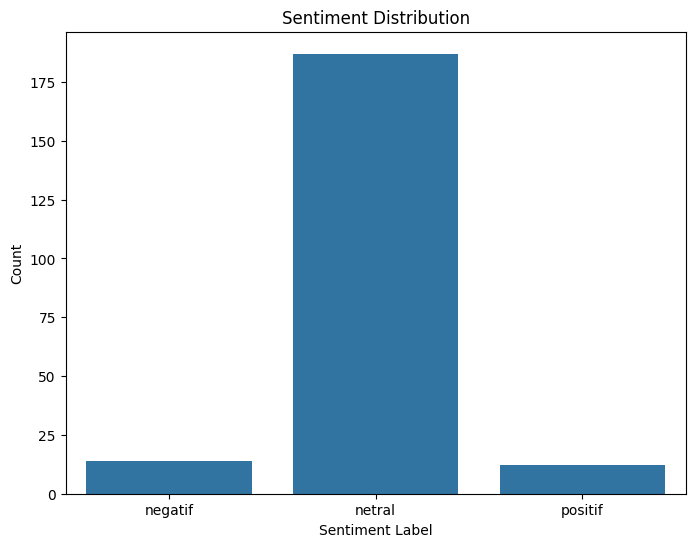

In [29]:
#Membuat grafik plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=Gaza)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

Membuat grafik batang untuk menampilkan jumlah data pada tiap kategori sentimen.
Menggunakan matplotlib dan seaborn, grafik menunjukkan distribusi label 'positif', 'netral', dan 'negatif'.
Tujuannya untuk memvisualisasikan sebaran sentimen dalam data Gaza.










In [30]:
# prompt: Buat word cloud dari setiap kategori

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

"!pip install wordcloud" digunakan untuk menginstal library wordcloud.
Library ini dipakai untuk membuat visualisasi kata populer dalam bentuk Word Cloud.
Baris berikutnya mengimpor WordCloud dan matplotlib.pyplot untuk membuat dan menampilkan Word Cloud nantinya.

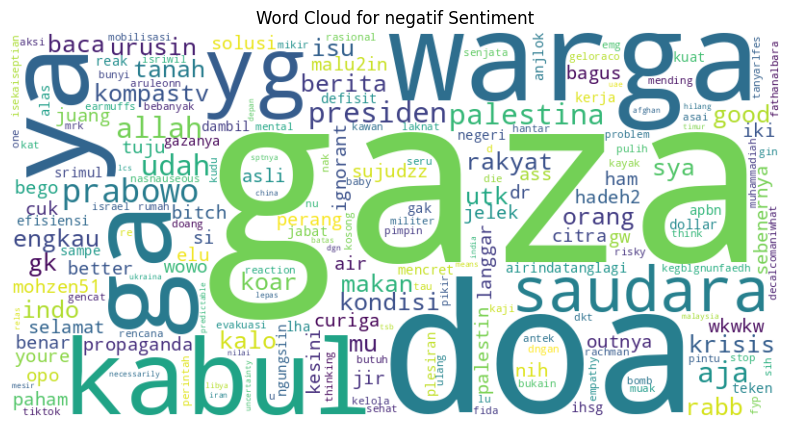

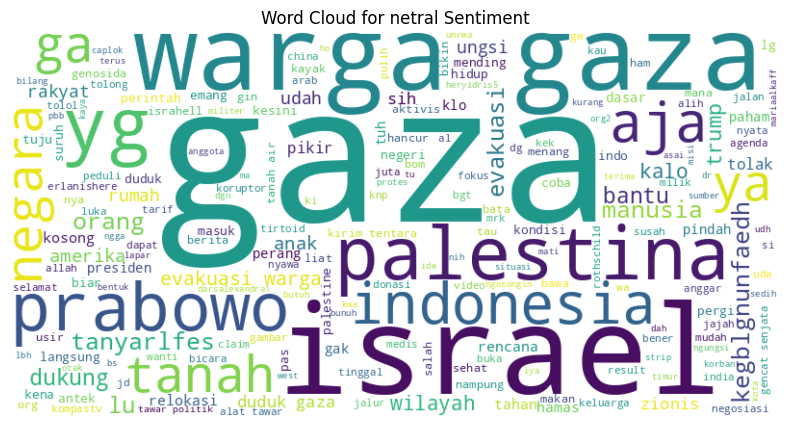

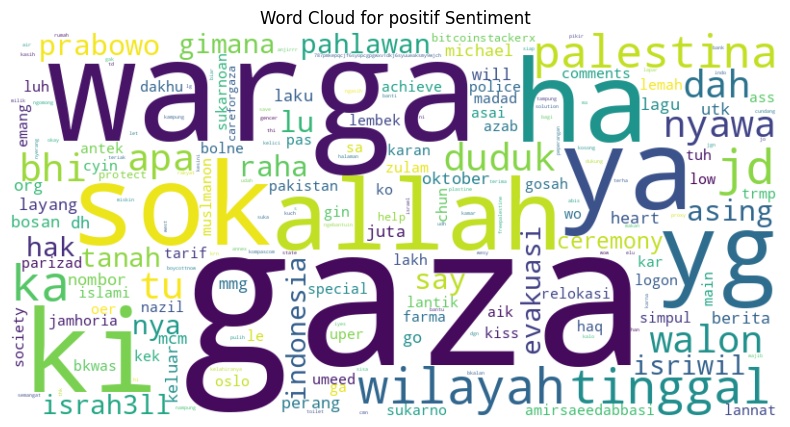

In [31]:
# Group data by sentiment label
sentiment_groups = Gaza.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


Kode diatas membuat **Word Cloud** untuk tiap kategori sentimen di data `Gaza`.  
Data dikelompokkan berdasarkan **`sentiment_label`**, lalu semua kata dalam tiap grup digabung.  
Hasilnya divisualisasikan jadi Word Cloud per kategori sentimen menggunakan `WordCloud` dan ditampilkan dengan `matplotlib`.